# Task 1

## Question 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

### Initialization

In [3]:
df = pd.DataFrame({
    'x': [3, 3, 2, 2, 6, 6, 7, 7, 8, 7],
    'y': [5, 4, 8, 3, 2, 4, 3, 4, 5, 6]
})

In [4]:
np.random.seed(200)

In [5]:
k = 2

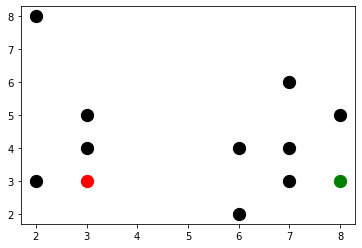

In [6]:
plt.scatter(df['x'], df['y'], s=150, color = 'k')

#Initialize with two centroids
centroids = {1: [3, 3], 2: [8, 3]}

colmap = {1:'r', 2:'g'}

for i in centroids.keys():
    plt.scatter(*centroids[i], s=150, color=colmap[i])

plt.show()

### Assignment Stage

In [7]:
def assignment(df, centroids):
    for i in centroids.keys():
        #Using Manhattan distance as the distance metric
        df['distance_from_{}'.format(i)] = (     
                abs(df['x'] - centroids[i][0]) 
                    + abs(df['y'] - centroids[i][1]))
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
df.head()

,x,y,distance_from_1,distance_from_2,closest,color
0,3,5,2,7,1,r
1,3,4,1,6,1,r
2,2,8,6,11,1,r
3,2,3,1,6,1,r
4,6,2,4,3,2,g


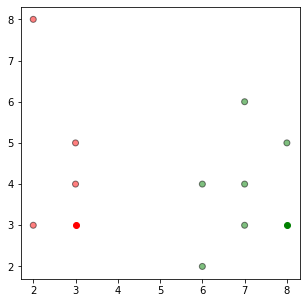

In [8]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color = df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])

plt.show()

### Update Stage

{1: [2.5, 5.0], 2: [6.833333333333333, 4.0]}


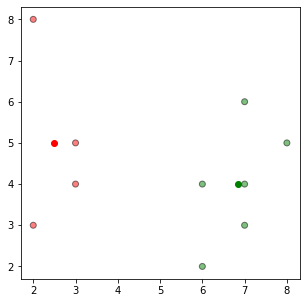

In [9]:
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)
print(centroids)
fig = plt.figure(figsize=(5,5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

### Repeat Assignment stage

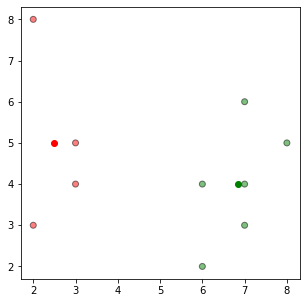

In [10]:
df = assignment(df, centroids)

## Plot results
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

### Continue until all assigned categories don't change any more

In [11]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

### Plot Final results

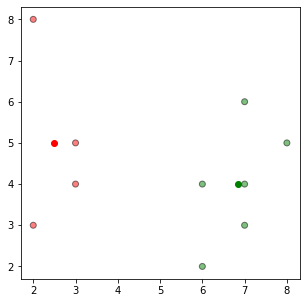

In [12]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

### Final Centroids coordinates of two clusters

In [13]:
print(centroids)

{1: [2.5, 5.0], 2: [6.833333333333333, 4.0]}


# Implementing K-means using sklearn

In [14]:
from sklearn.cluster import KMeans
df = pd.DataFrame({
    'x': [3, 3, 2, 2, 6, 6, 7, 7, 8, 7],
    'y': [5, 4, 8, 3, 2, 4, 3, 4, 5, 6]
})
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)

KMeans(n_clusters=2)

In [15]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

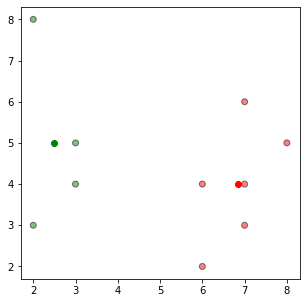

In [16]:
fig = plt.figure(figsize=(5,5))

colors = map(lambda x: colmap[x+1], labels)
colors1 = list(colors)
plt.scatter(df['x'], df['y'], color=colors1, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.show()

### Final Centroids coordinates of two clusters

In [17]:
print(centroids)

[[6.83333333 4.        ]
 [2.5        5.        ]]


### When we compare the results of own kmeans implementation(Hamming Distance) with sklearn kmeans implementation(Euclidean Distance)
#### Result :
##### - Two clusters are separted with the same respective points but only the color of clusters got changed 
##### - Even though scikit-learn implementation of k-means only uses Euclidean distances but with the initialization of the two centroids (3, 3) and (8, 3) with Manhattan distances gives the same result
##### - Initialization of centroids plays a main role